In [1]:
import torch
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("USING device :",device)
print(torch.cuda.get_device_name(0))    

USING device : cuda
NVIDIA RTX A2000


In [2]:
import os

training_data = r"/home/parul/Downloads/archive/seg_train/seg_train"
testing_data = r"/home/parul/Downloads/archive/seg_test/seg_test"

class_paths = []

for item in os.listdir(training_data):
    item_path = os.path.join(training_data, item)
    if os.path.isdir(item_path):
        class_paths.append(item_path)

print("Classes found:", class_paths)

Classes found: ['/home/parul/Downloads/archive/seg_train/seg_train/buildings', '/home/parul/Downloads/archive/seg_train/seg_train/forest', '/home/parul/Downloads/archive/seg_train/seg_train/street', '/home/parul/Downloads/archive/seg_train/seg_train/sea', '/home/parul/Downloads/archive/seg_train/seg_train/mountain', '/home/parul/Downloads/archive/seg_train/seg_train/glacier']


In [3]:
images=[]
labels=[]


# 2. For each class folder, gather image file paths
for class_path in class_paths:
    # Loop over each file in the class folder
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        # Checr = LabelEncoder()k if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            images.append(file_path)

In [4]:
images[:5]

['/home/parul/Downloads/archive/seg_train/seg_train/buildings/4178.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13400.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/11410.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13247.jpg',
 '/home/parul/Downloads/archive/seg_train/seg_train/buildings/20017.jpg']

In [5]:
for image_path in images:
    # os.path.dirname(image_path) gives the directory path (e.g., ".../seg_train/forest")
    # os.path.basename(...) then gives the last part of that path (e.g., "forest")
    class_name = os.path.basename(os.path.dirname(image_path))
    labels.append(class_name)

print( images[:5])
print(labels[:5])

['/home/parul/Downloads/archive/seg_train/seg_train/buildings/4178.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13400.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/11410.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/13247.jpg', '/home/parul/Downloads/archive/seg_train/seg_train/buildings/20017.jpg']
['buildings', 'buildings', 'buildings', 'buildings', 'buildings']


In [6]:
training_array=[]
training_array.append(images)
training_array.append(labels)

In [7]:

import cv2

img_array=[] 
for img_path in images:
    img = cv2.imread(img_path)
    
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img_array.append(img)

In [8]:
labels[:5]

['buildings', 'buildings', 'buildings', 'buildings', 'buildings']

In [9]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

# Fit the encoder on your labels and transform them to numeric values
encoded_labels = label_encoder.fit_transform(labels)

# Display the encoded labels
print("Encoded Labels:", encoded_labels)

# Display the mapping from class names to integers
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", mapping)

Encoded Labels: [0 0 0 ... 2 2 2]
Label Mapping: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [10]:
# import torch.nn.functional as F
# encoded_labels_tensor = torch.tensor(encoded_labels)

1
3
Python [conda env:base] | Idle
1
VGG19.ipynb
Ln 1, Col 48
Mode: Command
Would you like to get notified about official Jupyter news?

# one_hot_labels= F.one_hot(encoded_labels_tensor,num_classes=6)

# print("Integer Labels:", encoded_labels)
# print("One-Hot Encoded Labels:\n", one_hot_labels)

In [11]:
import numpy as np
np.unique(labels)

array(['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street'],
      dtype='<U9')

In [12]:
import matplotlib.pyplot as plt

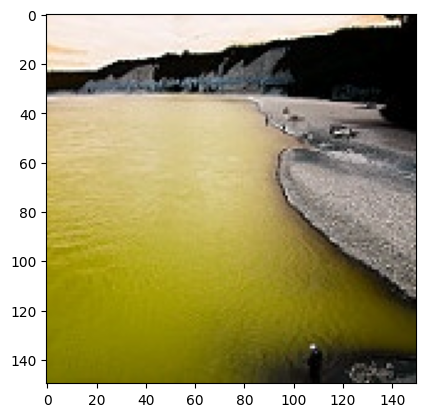

In [13]:
img=cv2.imread(images[-2])
plt.imshow(img)



In [14]:
images_np = np.array(img_array)
encoded_labels_np = np.array(encoded_labels)

# Create a random permutation of indices
1
3
Python [conda env:base] | Idle
1
VGG19.ipynb
Ln 1, Col 48
Mode: Command
Would you like to get notified about official Jupyter news?

indices = np.random.permutation(len(images_np))

# Use the indices to shuffle both arrays
shuffled_images = images_np[indices]
shuffled_labels = encoded_labels[indices]

In [15]:
training_images=shuffled_images
labels=shuffled_labels

In [16]:
len(training_images)

14034

In [17]:
labels_training=labels

**TRAINING DATA PREPROCESSING**

In [18]:
import os

training_data = r"/home/parul/Downloads/archive/seg_train/seg_train"
testing_data = r"/home/parul/Downloads/archive/seg_test/seg_test"

class_paths = []

for item in os.listdir(testing_data):
    item_path = os.path.join(testing_data, item)
    if os.path.isdir(item_path):
        class_paths.append(item_path)

print("Classes found:", class_paths)


Classes found: ['/home/parul/Downloads/archive/seg_test/seg_test/buildings', '/home/parul/Downloads/archive/seg_test/seg_test/forest', '/home/parul/Downloads/archive/seg_test/seg_test/street', '/home/parul/Downloads/archive/seg_test/seg_test/sea', '/home/parul/Downloads/archive/seg_test/seg_test/mountain', '/home/parul/Downloads/archive/seg_test/seg_test/glacier']


In [19]:
images=[]
labels=[]


# 2. For each class folder, gather image file paths
for class_path in class_paths:
    # Loop over each file in the class folder
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        # Check if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            images.append(file_path)

In [20]:
images[:5]

['/home/parul/Downloads/archive/seg_test/seg_test/buildings/20186.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/21631.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/20553.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/22665.jpg',
 '/home/parul/Downloads/archive/seg_test/seg_test/buildings/23297.jpg']

In [21]:
for image_path in images:
    # os.path.dirname(image_path) gives the directory path (e.g., ".../seg_train/forest")
    # os.path.basename(...) then gives the last part of that path (e.g., "forest")
    class_name = os.path.basename(os.path.dirname(image_path))
    labels.append(class_name)

print( images[:5])
print(labels[:5])

['/home/parul/Downloads/archive/seg_test/seg_test/buildings/20186.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/21631.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/20553.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/22665.jpg', '/home/parul/Downloads/archive/seg_test/seg_test/buildings/23297.jpg']
['buildings', 'buildings', 'buildings', 'buildings', 'buildings']


In [22]:
import cv2

img_array=[] 
for img_path in images:
    img = cv2.imread(img_path)
    
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img_array.append(img)

In [23]:
from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()

# Fit the encoder on your labels and transform them to numeric values
encoded_labels = label_encoder.fit_transform(labels)

# Display the encoded labels
print("Encoded Labels:", encoded_labels)

# Display the mapping from class names to integers
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", mapping)

Encoded Labels: [0 0 0 ... 2 2 2]
Label Mapping: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [24]:
# import torch.nn.functional as F
# encoded_labels_tensor = torch.tensor(encoded_labels)

# one_hot_labels= F.one_hot(encoded_labels_tensor,num_classes=6)

# print("Integer Labels:", encoded_labels)
# print("One-Hot Encoded Labels:\n", one_hot_labels)

In [25]:
print(images[-1],encoded_labels[-1])

/home/parul/Downloads/archive/seg_test/seg_test/glacier/24334.jpg 2


In [26]:
images_np = np.array(img_array)
encoded_labels_np = np.array(encoded_labels)

# Create a random permutation of indices
indices = np.random.permutation(len(images_np))

# Use the indices to shuffle both arrays
shuffled_images = images_np[indices]
shuffled_encoded_labels = encoded_labels_np[indices]

In [27]:
testing_images=shuffled_images
encoded_labels=shuffled_encoded_labels


In [28]:
labels_testing=encoded_labels

In [29]:
len(testing_images)

3000

In [76]:
from torch.utils.data import Dataset,DataLoader
from PIL import Image
class CustomDataset(Dataset):
    def __init__(self,images,labels,transform=None):
        self.images=images
        self.labels=labels
        self.transform =transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self,idx):
        img=Image.fromarray((self.images[idx]*255).astype(np.uint8))
        label=self.labels[idx]
        if self.transform:
            img=self.transform(img)
        return img,label

        

In [77]:
from torchvision import models,transforms
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),   # Data augmentation
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [78]:
train_dataset= CustomDataset(training_images,labels_training,transform=transform_train)
test_dataset=CustomDataset(testing_images,labels_testing,transform=transform_test)

train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [79]:
vgg19=models.vgg19(pretrained=True)



In [80]:
import torch.nn as nn
import torch.optim as optim
for param in vgg19.features.parameters():
    param.requires_grad=False

num_features=vgg19.classifier[6].in_features
vgg19.classifier[6]=nn.Linear(num_features,6)

vgg19=vgg19.to(device)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(vgg19.classifier[6].parameters(),lr=0.001)



In [81]:
#   --Training Loop--

num_epochs=20
for epoch in range(num_epochs):
    vgg19.train()
    running_loss=0.0
    for images,labels in train_loader:
        images=images.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        outputs=vgg19(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()*images.size(0)
    epoch_loss=running_loss/len(train_dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}],Loss:{epoch_loss:.4f}")

Epoch [1/20],Loss:0.4058
Epoch [2/20],Loss:0.3502
Epoch [3/20],Loss:0.3417
Epoch [4/20],Loss:0.3392
Epoch [5/20],Loss:0.3252
Epoch [6/20],Loss:0.3203
Epoch [7/20],Loss:0.3280
Epoch [8/20],Loss:0.3313
Epoch [9/20],Loss:0.3276
Epoch [10/20],Loss:0.3272
Epoch [11/20],Loss:0.3340
Epoch [12/20],Loss:0.3319
Epoch [13/20],Loss:0.3357
Epoch [14/20],Loss:0.3289
Epoch [15/20],Loss:0.3331
Epoch [16/20],Loss:0.3147
Epoch [17/20],Loss:0.3202
Epoch [18/20],Loss:0.3348
Epoch [19/20],Loss:0.3319
Epoch [20/20],Loss:0.3155


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

vgg19.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg19(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

report = classification_report(all_labels, all_preds, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

   buildings       0.94      0.87      0.90       437
      forest       0.99      1.00      0.99       474
     glacier       0.86      0.82      0.84       553
    mountain       0.84      0.84      0.84       525
         sea       0.91      0.94      0.93       510
      street       0.89      0.95      0.92       501

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



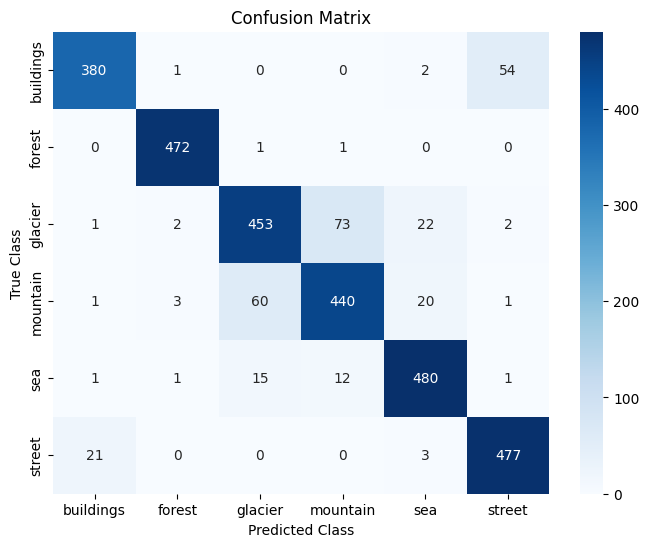

In [85]:
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

In [88]:
cd

/home/parul


In [87]:
import os
import random
from PIL import Image
import torch
from torchvision import transforms
import matplotlib.pyplot as plt

# # Path to your prediction folder
pred_folder = "Downloads/archive/seg_pred/seg_pred"

# List all image files in the folder (adjust the extensions as needed)
pred_files = [os.path.join(pred_folder, f) for f in os.listdir(pred_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# # Choose a random image from the folder
random_image_path = random.choice(pred_files)
print("Random image path:", random_image_path)

# Open the image and ensure it's in RGB format
img = Image.open(random_image_path).convert("RGB")

# Define the same transformation used in training
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to 128x128
    transforms.ToTensor(),          # Converts to tensor and scales pixel values to [0, 1]
    # If you applied normalization during training, add it here.
    # Example: transforms.Normalize(mean=[...], std=[...])
])


# Apply transformation and add batch dimension
img_tensor = transform(img).unsqueeze(0)

# Move model and image tensor to the device (GPU if available)
vgg19.to(device)
img_tensor = img_tensor.to(device)

# Evaluate the model on the image
vgg19.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted = torch.max(output, 1)

predicted_label = predicted.item()

# Define the class names in the same order as during training
class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class_name = class_names[predicted_label]

print("Predicted label:", predicted_label)
print("Predicted class:", predicted_class_name)


plt.imshow(img)
plt.title(f"Predicted label: {predicted_label} - {predicted_class_name}")
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/archive/seg_pred/seg_pred'